<h1> Analysis of Amazon Sales Data </h1>
The Amazon sales dataset consists of 128,976 records across 21 columns, covering the period from March 31, 2022, to June 29, 2022. The dataset includes various sale categories and attributes such as:
<ul>
<li>index</li>
<li>Order ID</li>
<li>Date</li>
<li>Status</li>
<li>Fulfilment</li>
<li>Sales Channel</li>
<li>ship-service-level</li>
<li>Category</li>
<li>Size</li>
<li>Courier Status</li>
<li>Quantity</li>
<li>Currency</li>
<li>Amount</li>
<li>ship-city</li>
<li>ship-states</li>
<li>ship-postal-code</li>
<li>ship-country</li>
<li>B2B</li>
<li>Fulfilled By</li>
<li>New</li>
<li>PendingS</li>
</ul>

This dataset contains a mix of text, numerical (float), and datetime values, which can be challenging to manage and analyze manually.
<br><br>
To address this complexity and extract valuable insights, I will use Python and its data analysis libraries in combination with Microsoft Excel. Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn will be utilized for data manipulation, statistical analysis, and visualization. Microsoft Excel will be employed for additional data inspection and preliminary analysis.
<br><br>
By leveraging these tools, the goal is to uncover key trends, patterns, and insights from the sales data, which can inform business decisions and strategies.

In [ ]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Load the data
df = pd.read_csv("/content/Amazon Sale Report.csv")
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,113116,404-8924840-1497908,06-11-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,533.0,1,UTTARAKHAND,248001.0,IN,False,NaN,NaN,NaN
1,40702,171-4059595-6237149,04-06-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,...,INR,389.0,(CHIKMAGALUR,KARNATAKA,577136.0,IN,False,Easy Ship,NaN,NaN
2,93601,406-5480144-6829925,06-27-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1163.0,.GANNAVARAM,GOA,403703.0,IN,False,NaN,NaN,NaN
3,13339,405-9197558-5977110,04-22-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,563.0,53MILES,TELANGANA,500038.0,IN,False,NaN,NaN,NaN
4,114108,408-2391847-7249162,06-11-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,1122.0,AALO,UTTAR PRADESH,224001.0,IN,False,NaN,NaN,NaN


In [ ]:
# Convert the date columns to date format, since date format is not consistent I'm creating a function which will convert given format to a single format.
# date format present in data - 04-06-2022 & 04-22-22 in %m-%d-%y format

def convert_to_datetime(date_str):
    for fmt in ['%m-%d-%Y', '%m-%d-%y']:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

df['Date'] = df['Date'].apply(convert_to_datetime)


## Clean the data

In [ ]:
# drop New and PendingS columns
df_new = df.drop(["New","PendingS"], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128976 no

In [ ]:
# fill missing value with mode, mean, 0 values of columns
df_new['currency'] = df_new['currency'].fillna(df_new['currency'].mode()[0]) #with mode value of column
df_new['Amount'] = df_new['Amount'].fillna(0) # with 0 value
df_new['ship-city'] = df_new['ship-city'].fillna(df_new['ship-city'].mode()[0]) # with mode value
df_new['ship-state'] = df_new['ship-state'].fillna(df_new['ship-state'].mode()[0]) # with mode value
df_new['ship-postal-code'] = df_new['ship-postal-code'].fillna(df_new['ship-postal-code'].mode()[0]) # with mode value
df_new['ship-country'] = df_new['ship-country'].fillna(df_new['ship-country'].mode()[0]) # with mode value
df_new['fulfilled-by'] = df_new['fulfilled-by'].fillna(df_new['fulfilled-by'].mode()[0]) # with mode value
df_new.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,113116,404-8924840-1497908,2022-06-11,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,533.0,1,UTTARAKHAND,248001.0,IN,False,Easy Ship
1,40702,171-4059595-6237149,2022-04-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1,INR,389.0,(CHIKMAGALUR,KARNATAKA,577136.0,IN,False,Easy Ship
2,93601,406-5480144-6829925,2022-06-27,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1163.0,.GANNAVARAM,GOA,403703.0,IN,False,Easy Ship
3,13339,405-9197558-5977110,2022-04-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,563.0,53MILES,TELANGANA,500038.0,IN,False,Easy Ship
4,114108,408-2391847-7249162,2022-06-11,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,1122.0,AALO,UTTAR PRADESH,224001.0,IN,False,Easy Ship


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            128976 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128976 no

In [ ]:
# Data Export to csv file and download
df_new.to_csv('Amazon_Sale_new.csv', index=False)
# from google.colab import files
# files.download('Amazon_Sale_new.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df_new.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128976.000000,128976,128976.000000,128976.000000,128976.000000
mean,64486.130427,2022-05-12 11:49:26.951991040,0.904401,609.339491,463874.404300
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32242.750000,2022-04-20 00:00:00,1.000000,413.000000,382421.000000
50%,64486.500000,2022-05-10 00:00:00,1.000000,583.000000,500033.000000
75%,96730.250000,2022-06-04 00:00:00,1.000000,771.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.897832,NaN,0.313368,313.342529,191481.383425


# Objective

## 1. Sales Overview
Understand the overall sales performance, trends, and patterns overtime.

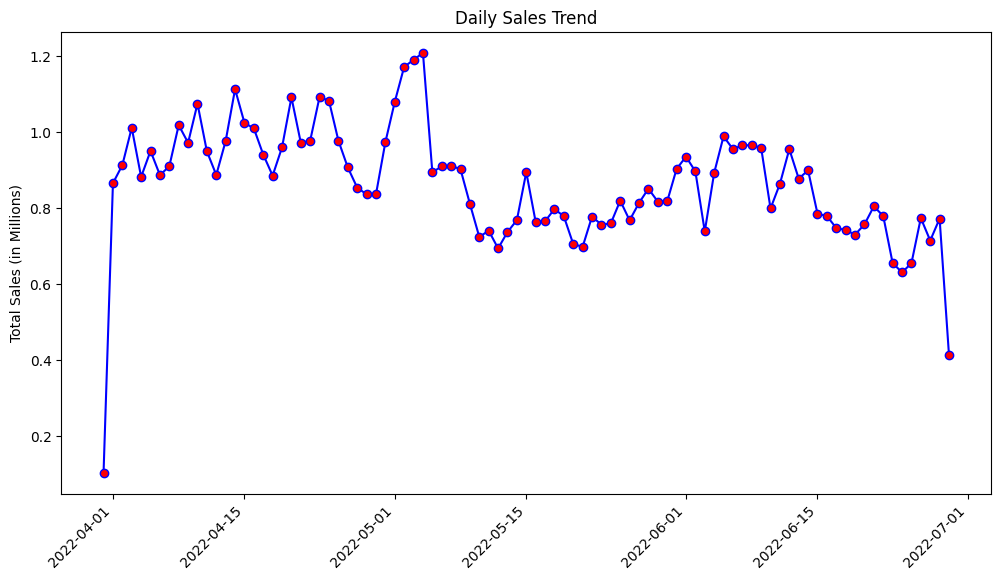

In [ ]:
# Group sales by date and calculate total sales for each day
plt.figure(figsize=(12,6))
daily_sales = df_new.groupby('Date')['Amount'].sum()
# Plot daily sales trend
plt.plot(daily_sales.index, daily_sales.values / 10**6, marker='o', color='blue', linestyle='-', markerfacecolor='red')
plt.ylabel('Total Sales (in Millions)')
plt.title('Daily Sales Trend')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Total sales
total_sales = df_new['Amount'].sum()
print(f"Total Sales: {total_sales:,.2f}\n")

# Extract month from the 'Date' column and create a new column
df_new['Month_Num'] = df_new['Date'].dt.month
df_new['Month'] = df_new['Date'].dt.strftime('%B')

# Create a mapping of month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df_new['Month'] = df_new['Month_Num'].map(month_names)

# Group sales by month and calculate total sales for each month
monthly_sales = df_new.groupby('Month')['Amount'].sum().round(2)

# Sort monthly sales in order of the months
month_order = list(month_names.values())
monthly_sales = monthly_sales.reindex(month_order).dropna()

print("Monthly Sales:")
for month, sales in monthly_sales.items():
    print(f"{month:<10} {sales:,.2f}") # Assign 10 character from left to months

Total Sales: 78,590,170.25

Monthly Sales:
March      101,683.85
April      28,836,200.27
May        26,226,476.75
June       23,425,809.38


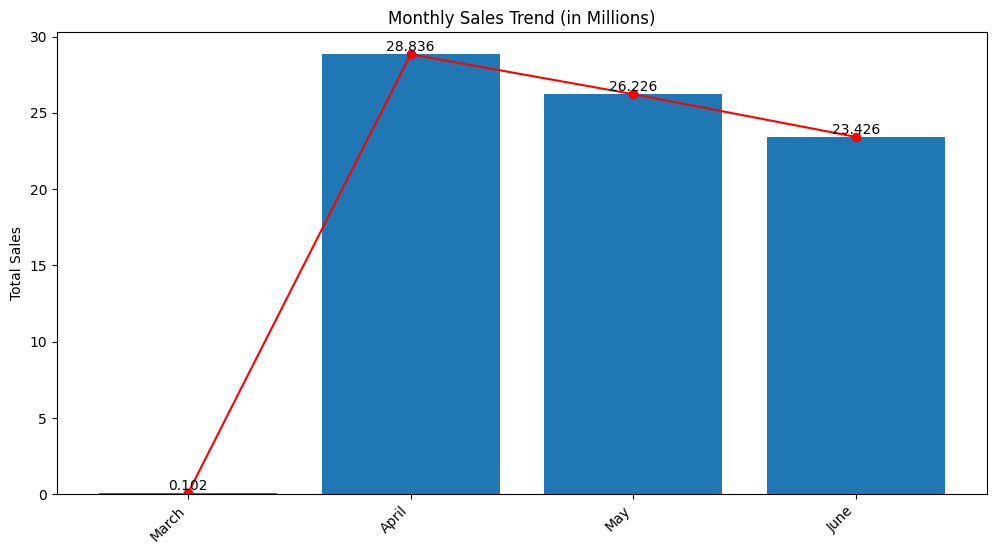

In [ ]:
# Plot monthly sales trend
plt.figure(figsize=(12,6))
bars = plt.plot(monthly_sales.index, monthly_sales.values / 10**6,marker='o',color='red')
bars = plt.bar(monthly_sales.index, monthly_sales.values / 10**6)

plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend (in Millions)')
plt.xticks(monthly_sales.index, monthly_sales.index, rotation=45, ha='right')

# Display sales data on the plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom') #(x,y,value....)

plt.show()

# **2. Product Analysis:**
Analyze the distribution of product categories, sizes, and quanties sold to identify popular products.

In [ ]:
# catergories-wise total sales
category_sales = df_new[df_new['Status']!='Cancelled'].groupby('Category').agg({'Amount':'sum', 'Order ID': 'count','Qty':'sum'}).reset_index()
category_sales.columns = ['Category', 'Total_sales_Amount', 'Number_of_Orders','Total_Qty']
print(category_sales)

   Category  Total_sales_Amount  Number_of_Orders  Total_Qty
0   Blazzer          10208802.0             13377      13417
1   Perfume            730946.0              1012       1014
2     Shirt          19425949.0             42623      42792
3     Shoes            115513.0               144        148
4     Socks            135813.0               381        385
5   T-shirt          35732860.0             42951      43037
6  Trousers           4902560.0              9341       9363
7    Wallet            418389.0               810        831
8     Watch               915.0                 3          3


Sales Distribution by Product Category

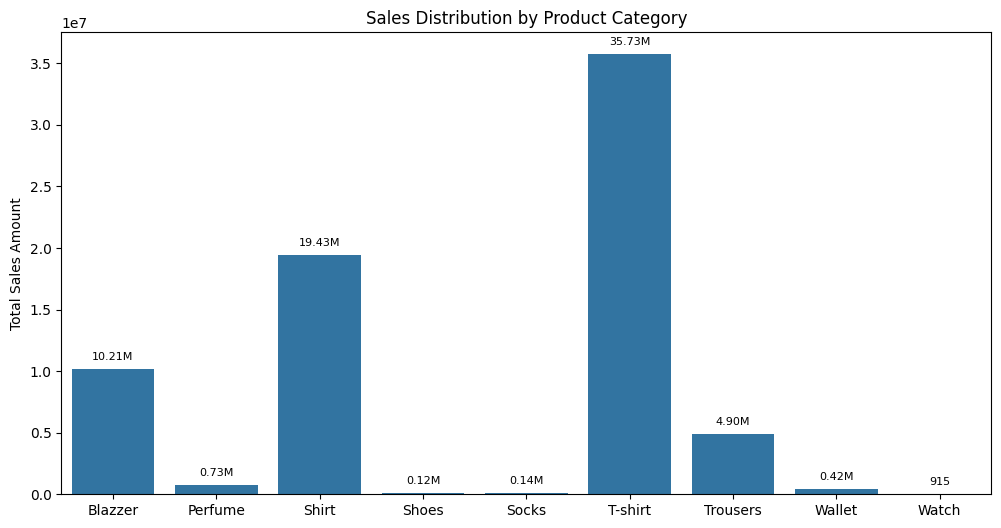

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=category_sales, x='Category', y='Total_sales_Amount')
ax.set_xlabel('')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Product Category')
for p in ax.patches:
    height = p.get_height()
    if height > 10**5:
        height_formatted = f'{height / 10**6:.2f}M' # Convert height to millions and format
    else:
        height_formatted = f'{height:.0f}'
    ax.annotate(height_formatted, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
# Size-wise total sales
size_sale = df_new[df_new['Status']!='Cancelled'].groupby('Size').agg({'Amount':'sum', 'Order ID': 'count','Qty':'sum'}).reset_index()
size_sale.columns = ['Size', 'Total_sales_Amount', 'Number_of_Orders','Total_Qty']
print(size_sale)

    Size  Total_sales_Amount  Number_of_Orders  Total_Qty
0    3XL           8319107.0             12794      12834
1    4XL            309571.0               379        381
2    5XL            399194.0               495        495
3    6XL            543153.0               666        666
4   Free           1265763.0              1969       1996
5      L          11888260.0             18706      18756
6      M          12418323.0             19044      19103
7      S           9461177.0             14219      14246
8     XL          11177932.0             17744      17788
9     XS           6277371.0              9208       9239
10   XXL           9611896.0             15418      15486


In [ ]:
# Categories, Size wise total sale, total order placed, total quantities ordered (will be using this data for visulization)
cate_size_sale = df_new[df_new['Status']!='Cancelled'].groupby(['Category', 'Size']).agg({'Amount':'sum', 'Order ID': 'count','Qty':'sum'}).reset_index()
cate_size_sale.columns = ['Category', 'Size', 'Total_sales_Amount', 'Number_of_Orders','Total_Qty']
print(cate_size_sale)

    Category  Size  Total_sales_Amount  Number_of_Orders  Total_Qty
0    Blazzer   3XL           1303969.0              1696       1700
1    Blazzer     L           1850839.0              2456       2459
2    Blazzer     M           1702629.0              2230       2241
3    Blazzer     S           1428138.0              1869       1876
4    Blazzer    XL           1582362.0              2053       2058
5    Blazzer    XS            903725.0              1211       1218
6    Blazzer   XXL           1437140.0              1862       1865
7    Perfume  Free            730946.0              1012       1014
8      Shirt   3XL           2269110.0              4953       4966
9      Shirt   4XL            258710.0               337        339
10     Shirt   5XL            333739.0               440        440
11     Shirt   6XL            459944.0               599        599
12     Shirt     L           3399020.0              7608       7638
13     Shirt     M           3214934.0          

In [ ]:
cate_size_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            45 non-null     object 
 1   Size                45 non-null     object 
 2   Total_sales_Amount  45 non-null     float64
 3   Number_of_Orders    45 non-null     int64  
 4   Total_Qty           45 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB


Total Sales by Category and Size

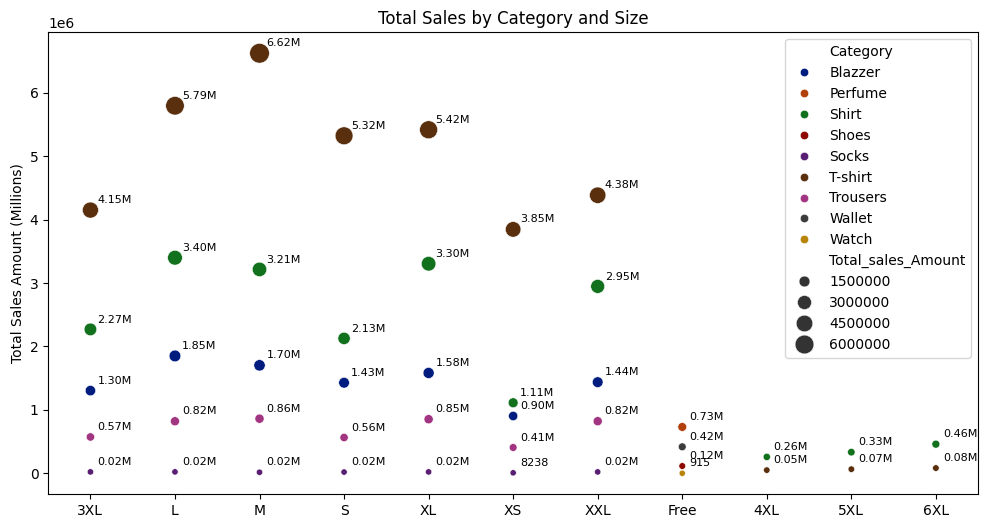

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=cate_size_sale, x='Size', y='Total_sales_Amount', hue='Category', palette="dark", size='Total_sales_Amount', sizes=(20, 200))
ax.set_xlabel('')
plt.ylabel('Total Sales Amount (Millions)')
plt.title('Total Sales by Category and Size')
# inserting data label
for x, y in zip(cate_size_sale['Size'], cate_size_sale['Total_sales_Amount']):
    if y > 10**4:
        text = f'{y / 10**6:.2f}M' # Format the text for large values
    else:
        text = f'{y:.0f}'
    plt.annotate(text, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8) # Annotate the bars

plt.show()

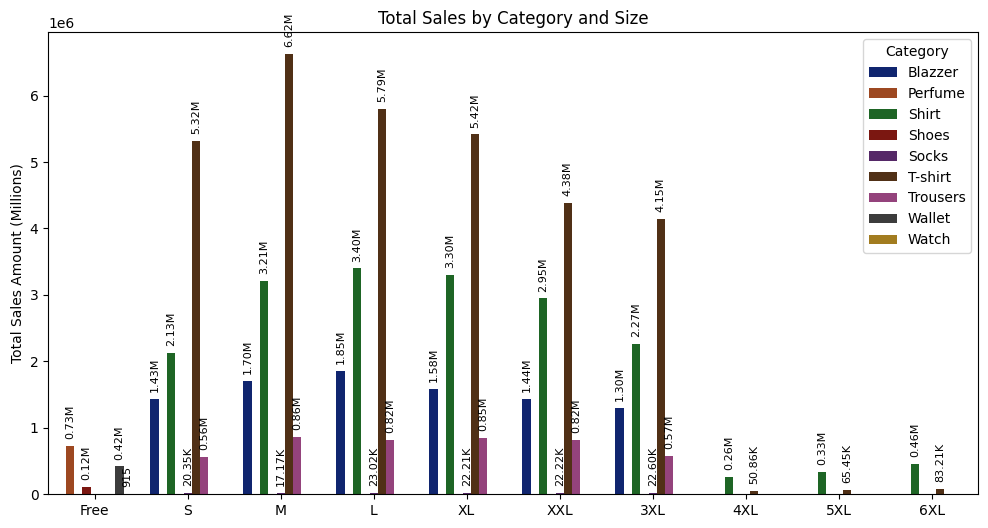

In [ ]:
plt.figure(figsize=(12, 6))
size_order = ['Free', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']
ax = sns.barplot(data=cate_size_sale, x='Size', y='Total_sales_Amount', hue='Category', palette="dark", order=size_order)
ax.set_xlabel('')
plt.ylabel('Total Sales Amount (Millions)')
plt.title('Total Sales by Category and Size')
# inserting data label
for p in ax.patches:
    height = p.get_height()
    if height>0:
      if height >= 10**5:
          height_formatted = f'{height / 10**6:.2f}M'
      elif height >= 10**3 and height<10**5:
          height_formatted = f'{height / 10**3:.2f}K'
      else:
          height_formatted = f'{height:.0f}'
      ax.annotate(height_formatted,
                  (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points'
                  , rotation=90)
plt.show()

Sales Quantity Distribution by Size and Category

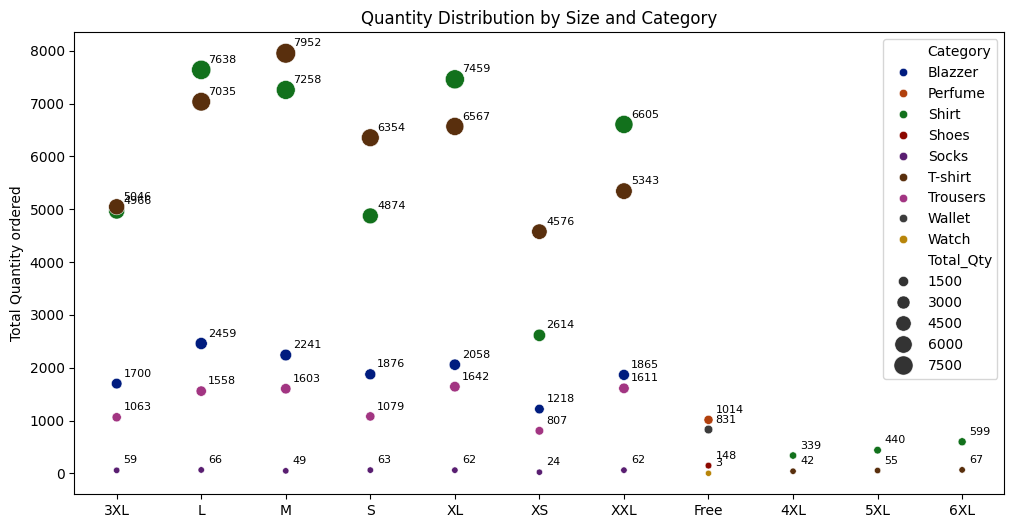

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=cate_size_sale, x='Size', y='Total_Qty', hue='Category', palette="dark", size='Total_Qty', sizes=(20, 200))
ax.set_xlabel('')
plt.ylabel('Total Quantity ordered')
plt.title('Quantity Distribution by Size and Category')
# inserting data label
for x, y, text in zip(cate_size_sale['Size'], cate_size_sale['Total_Qty'], cate_size_sale['Total_Qty'].astype(str)):
    plt.annotate(text, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.show()

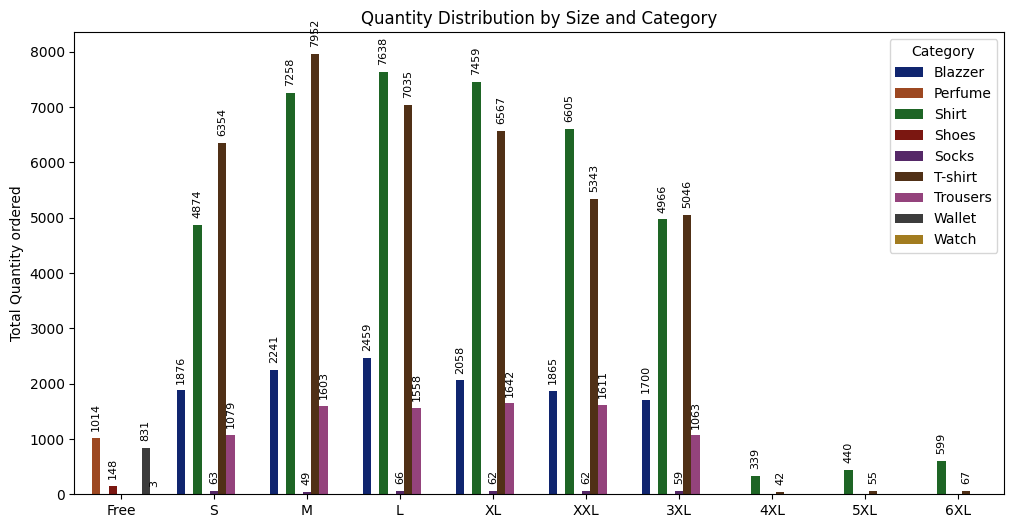

In [ ]:
plt.figure(figsize=(12,6))
size_order = ['Free', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']
ax = sns.barplot(data=cate_size_sale, x='Size', y='Total_Qty', hue='Category', palette="dark", order=size_order)
ax.set_xlabel('')
plt.ylabel('Total Quantity ordered')
plt.title('Quantity Distribution by Size and Category')
# inserting data label
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points', rotation=90)
plt.show()

# **3. Fulfillment Analysis:**
 Investigate the fulfillment methods used and their effectiveness in delivering orders.

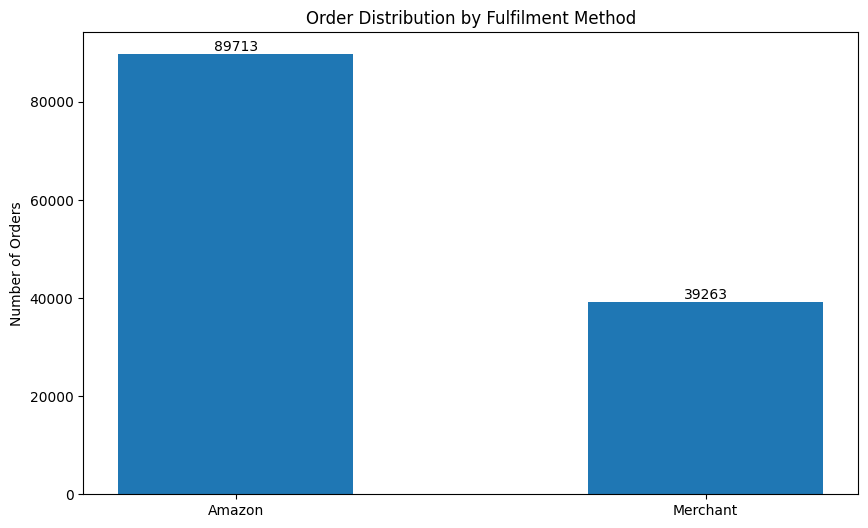

In [ ]:
fulfilment_analysis = df_new.groupby('Fulfilment').agg({'Order ID': 'count'}).reset_index()
fulfilment_analysis.columns = ['Fulfilment Method', 'Number of Orders']
plt.figure(figsize=(10,6))
plt.bar(fulfilment_analysis['Fulfilment Method'], fulfilment_analysis['Number of Orders'], width=0.5, align='center')
plt.title('Order Distribution by Fulfilment Method')
plt.ylabel('Number of Orders')
for index, value in enumerate(fulfilment_analysis['Number of Orders']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


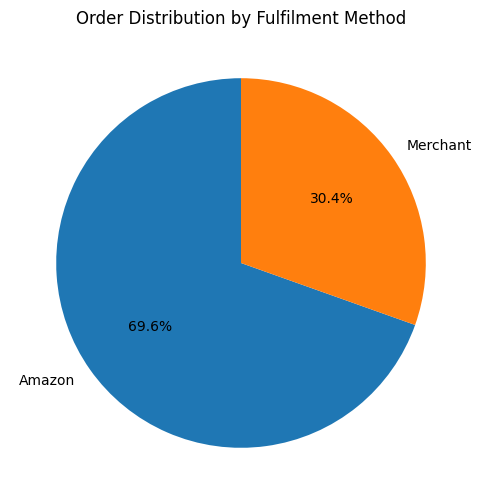

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(fulfilment_analysis['Number of Orders'], labels=fulfilment_analysis['Fulfilment Method'], autopct='%1.1f%%', startangle=90)
plt.title('Order Distribution by Fulfilment Method')
plt.show()

Order Status by Fulfilment Method

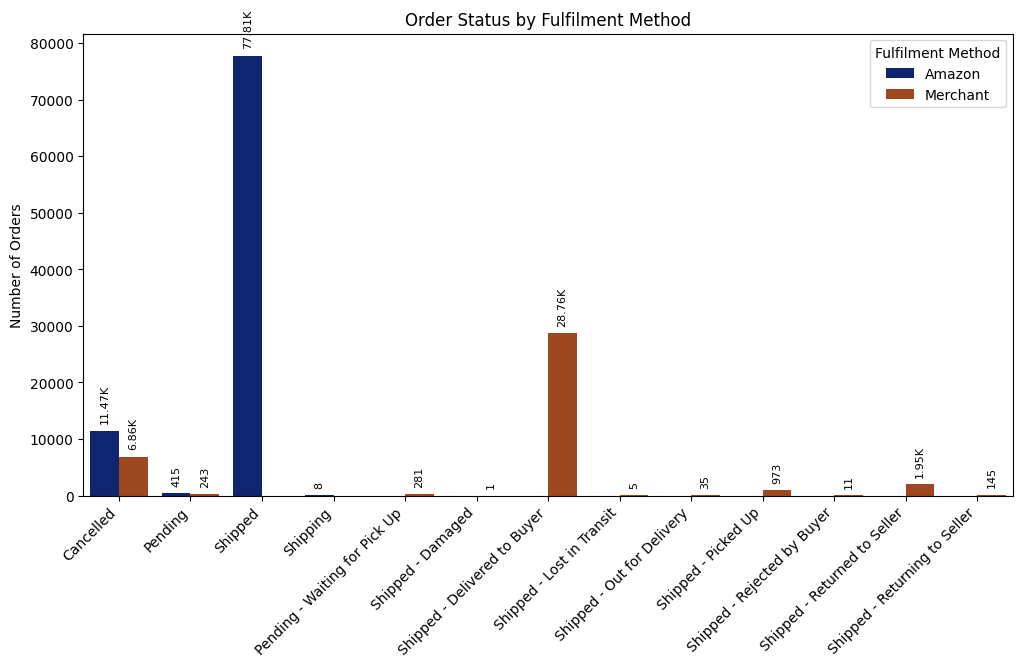

In [ ]:
plt.figure(figsize=(12,6))
status_by_fulfillment = df_new.groupby(['Fulfilment', 'Status']).agg({'Order ID': 'count'}).reset_index()
status_by_fulfillment.columns = ['Fulfilment Method', 'Status', 'Number of Orders']
ax = sns.barplot(data=status_by_fulfillment, x='Status', y='Number of Orders', hue='Fulfilment Method', palette='dark')
plt.title('Order Status by Fulfilment Method')
plt.ylabel('Number of Orders')
plt.legend(title='Fulfilment Method')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('')
# inserting data label
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      if height > 10 ** 3:
          height_formatted = f'{height / 10 ** 3:.2f}K'
      else:
          height_formatted = f'{height:.0f}'
      ax.annotate(height_formatted,
                  (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                  textcoords='offset points', rotation=90)  # Annotate the bar and rotate text vertically
plt.show()

# **4. Customer Segmentation:**
Segment customers based on their buying behaviour, location, and other relevant
factors.

In [ ]:
# data cleaning and modification
df_new['ship-postal-code'] = df_new['ship-postal-code'].astype(int)
df_new['ship-state'] = df_new['ship-state'].str.upper()
df_new['ship-city'] = df_new['ship-city'].str.upper()
df_new1 = df_new[(df_new['ship-postal-code'] <= 855117) & (df_new['ship-postal-code'] >=110001)] # Valid pincode range 110001 to 855117 (roughly)
df_new1.loc[:,'ship-city'] = df_new1['ship-city'].str[0:].str.replace('[,\.\(\)\s]', '', regex=True) # Remove delimiter from ship-city
df_new1 = df_new1[~df_new1['ship-city'].str.contains('\d')] # Remove rows with numbers in 'ship-city' column
df_new1.sample(5)
# df_new.info()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month_Num,Month
54589,91464,404-5949272-7217918,2022-06-29,Pending,Merchant,Amazon.in,Standard,T-shirt,3XL,Unshipped,...,INR,563.0,HYDERABAD,TELANGANA,500044,IN,False,Easy Ship,6,June
79359,28898,405-1183036-9503557,2022-04-13,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,L,Shipped,...,INR,657.0,MUMBAI,MAHARASHTRA,400072,IN,False,Easy Ship,4,April
60833,2151,408-6003340-0632330,2022-04-29,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,INR,654.0,JAMNAGAR,JHARKHAND,831012,IN,False,Easy Ship,4,April
80475,47526,405-7650095-6300317,2022-04-01,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Cancelled,...,INR,0.0,MUMBAI,MAHARASHTRA,400008,IN,False,Easy Ship,4,April
99322,100878,402-7883263-3173107,2022-06-21,Shipped,Amazon,Amazon.in,Expedited,Blazzer,3XL,Shipped,...,INR,735.0,OTTAPPALAM,KERALA,680561,IN,False,Easy Ship,6,June


In [ ]:
# Export Uniques city
!pip install openpyxl
unique_cities = df_new1['ship-city'].unique()
df_cities = pd.DataFrame({'Unique Cities': unique_cities})
df_cities.to_excel('unique_cities.xlsx', index=False)

In [ ]:
# # Data Export to csv file and download
# df_new.to_csv('Amazon_Sale_new2.csv', index=False)
# # from google.colab import files
# # files.download('Amazon_Sale_new.csv')

In [ ]:
# Create a dictionary to map incorrect state names to correct state names
state_mapping = {
    'RAJSHTHAN':'RAJASTHAN',
    'RJ': 'RAJASTHAN',
    'RAJSTHAN':'RAJASTHAN',
    'PUNJAB/MOHALI/ZIRAKPUR': 'PUNJAB',
    'PB': 'PUNJAB',
    'PONDICHERRY': 'PUDUCHERRY',
    'ORISSA': 'ODISHA',
    'NL': 'NAGALAND',
    'AR': 'ARUNACHAL PRADESH',
}
# Apply the mapping
df_new1.loc[:,'ship-state'] = df_new1['ship-state'].replace(state_mapping)
df_new1['ship-state'].unique()

array(['KARNATAKA', 'GOA', 'UTTAR PRADESH', 'JAMMU & KASHMIR',
       'ANDHRA PRADESH', 'WEST BENGAL', 'HIMACHAL PRADESH', 'SIKKIM',
       'ARUNACHAL PRADESH', 'MAHARASHTRA', 'ASSAM', 'PUNJAB', 'RAJASTHAN',
       'TELANGANA', 'TAMIL NADU', 'GUJARAT', 'HARYANA', 'BIHAR',
       'CHHATTISGARH', 'KERALA', 'JHARKHAND', 'MADHYA PRADESH', 'TRIPURA',
       'LAKSHADWEEP', 'MIZORAM', 'UTTARAKHAND', 'DADRA AND NAGAR',
       'MEGHALAYA', 'ODISHA', 'ANDAMAN & NICOBAR', 'DELHI', 'MANIPUR',
       'NEW DELHI', 'CHANDIGARH', 'PUDUCHERRY', 'LADAKH', 'NAGALAND'],
      dtype=object)

In [ ]:
# state mapping code for plotting purpose
state_mapping = {
    "MAHARASHTRA": "MH",
    "KARNATAKA": "KA",
    "TELANGANA": "TG",
    "UTTAR PRADESH": "UP",
    "TAMIL NADU": "TN",
    "DELHI": "DL",
    "KERALA": "KL",
    "WEST BENGAL": "WB",
    "ANDHRA PRADESH": "AD",
    "HARYANA": "HR",
    "GUJARAT": "GJ",
    "RAJASTHAN": "RJ",
    "MADHYA PRADESH": "MP",
    "BIHAR": "BR",
    "ODISHA": "OD",
    "PUNJAB": "PB",
    "ASSAM": "AS",
    "UTTARAKHAND": "UK",
    "JHARKHAND": "JH",
    "GOA": "GA",
    "CHHATTISGARH": "CG",
    "HIMACHAL PRADESH": "HP",
    "JAMMU & KASHMIR": "JK",
    "MANIPUR": "MN",
    "CHANDIGARH": "CH",
    "PUDUCHERRY": "PY",
    "ANDAMAN & NICOBAR": "AN",
    "NAGALAND": "NL",
    "SIKKIM": "SK",
    "MEGHALAYA": "ML",
    "ARUNACHAL PRADESH": "AR",
    "TRIPURA": "TR",
    "NEW DELHI": "DL",
    "DADRA AND NAGAR": "DN",
    "MIZORAM": "MZ",
    "LADAKH": "LA",
    "LAKSHADWEEP": "LD"
}
# Apply the mapping and create new column
df_new1['State_Code'] = df_new1['ship-state'].map(state_mapping)
state_sales = df_new1[df_new1['Status'] !='Cancelled'].groupby('State_Code').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
state_sales.columns = ['State_Code', 'Total_sales_Amount', 'Number_of_Orders']

In [ ]:
df_new1.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month_Num,Month,State_Code
1,40702,171-4059595-6237149,2022-04-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,...,389.0,CHIKMAGALUR,KARNATAKA,577136,IN,False,Easy Ship,4,April,KA
2,93601,406-5480144-6829925,2022-06-27,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,1163.0,GANNAVARAM,GOA,403703,IN,False,Easy Ship,6,June,GA
4,114108,408-2391847-7249162,2022-06-11,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,1122.0,AALO,UTTAR PRADESH,224001,IN,False,Easy Ship,6,June,UP
5,76841,405-4670277-3653952,2022-05-09,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,...,641.0,AAMBYVALLEY,JAMMU & KASHMIR,182301,IN,False,Easy Ship,5,May,JK
6,69597,402-5721171-6991533,2022-05-15,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,...,949.0,AAMBYVALLEY,UTTAR PRADESH,276001,IN,False,Easy Ship,5,May,UP


In [ ]:
# Data Export to csv file and download
df_new1.to_csv('Amazon_Sale_Report_transformed.csv', index=False)
# from google.colab import files
# files.download('Amazon_Sale_new.csv')

   State_Code  Total_sales_Amount  Number_of_Orders
19         MH          12244729.0             19329
15         KA           9646534.0             15074
30         TG           6286353.0              9692
34         UP           6190584.0              9039
31         TN           5955890.0              9892


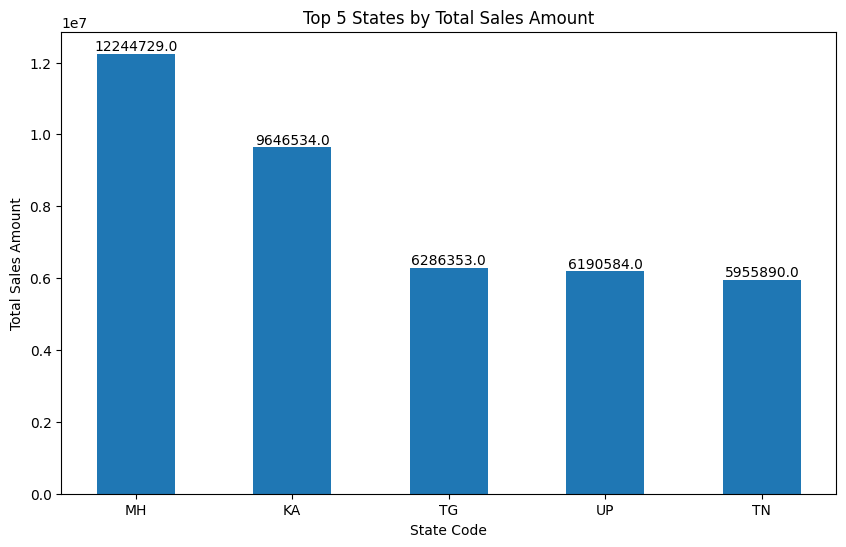

In [ ]:
# top 5 states by total_sales_amount
sorted_state_sales = state_sales.sort_values('Total_sales_Amount')
top_5_states = sorted_state_sales[::-1].head(5)
print(top_5_states)

plt.figure(figsize=(10, 6))
plt.bar(top_5_states['State_Code'], top_5_states['Total_sales_Amount'], width=0.5, align='center')
plt.title('Top 5 States by Total Sales Amount')
plt.xlabel('State Code')
plt.ylabel('Total Sales Amount')

# Display the values on top of the bars
for index, value in enumerate(top_5_states['Total_sales_Amount']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

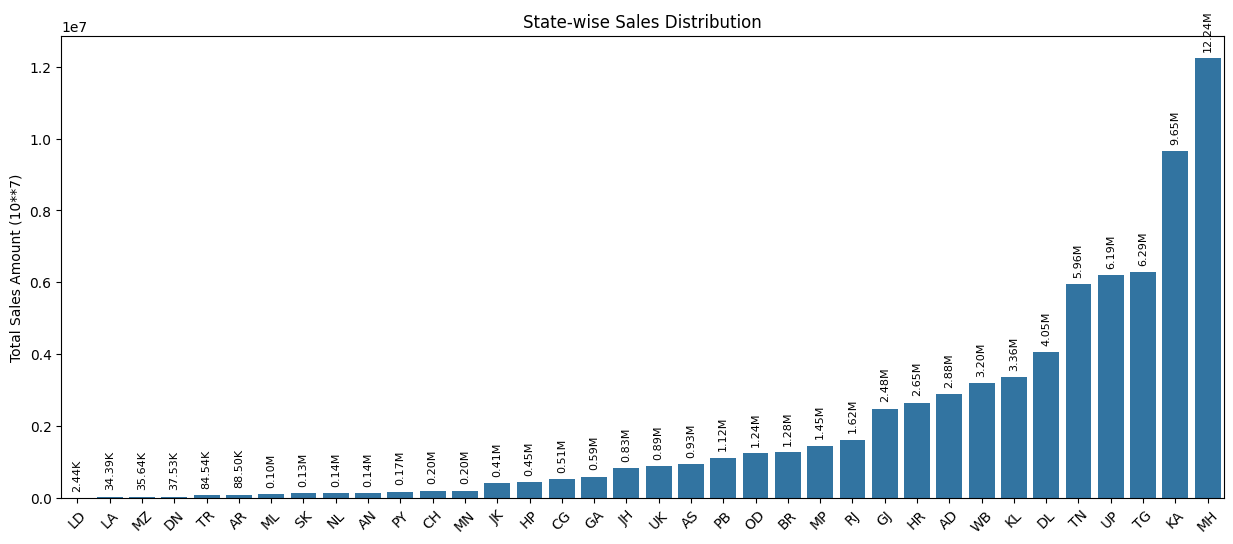

In [ ]:
# State-wise Sales Distribution
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=sorted_state_sales, x='State_Code', y='Total_sales_Amount')
plt.ylabel('Total Sales Amount (10**7)')
plt.title('State-wise Sales Distribution')
ax.set_xlabel('')
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    if height > 10 **5 :
        height_formatted = f'{height / 10 ** 6:.2f}M'
    elif height >= 10 **2 and height<=10**5:
        height_formatted = f'{height / 10 ** 3:.2f}K'
    else:
        height_formatted = f'{height:.2f}'
    ax.annotate(height_formatted,
                (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points', rotation=90)
plt.show()


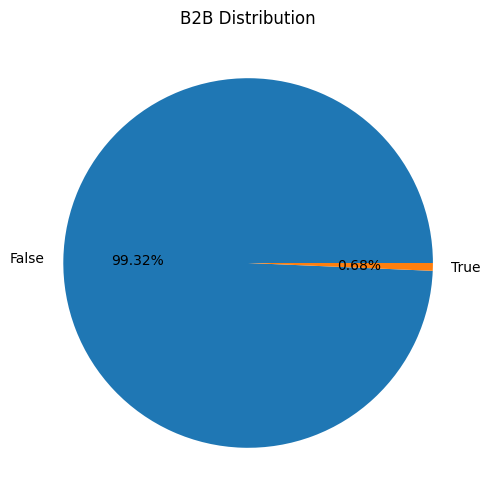

In [ ]:
# Buying behaviour distribution
b2b_counts = df_new1['B2B'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(b2b_counts, labels=b2b_counts.index, autopct='%1.2f%%', startangle=0)
plt.title('B2B Distribution')
plt.show()


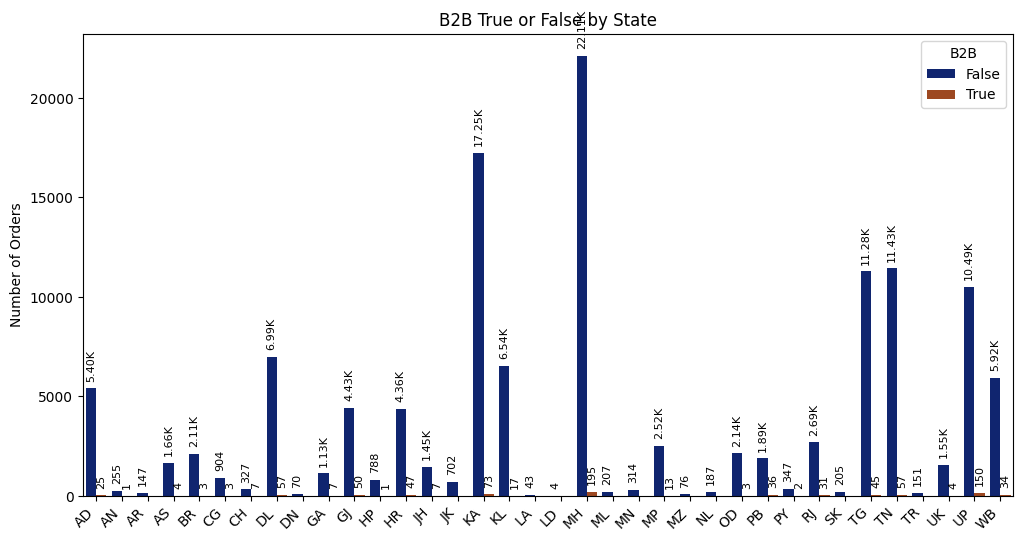

In [ ]:
# B2B True or False by State
plt.figure(figsize=(12, 6))
b2b_by_state = df_new1.groupby(['State_Code', 'B2B']).agg({'Order ID': 'count'}).reset_index()
b2b_by_state.columns = ['State_Code', 'B2B', 'Number of Orders']
ax = sns.barplot(data=b2b_by_state, x='State_Code', y='Number of Orders', hue='B2B', palette='dark')
plt.title('B2B True or False by State')
plt.ylabel('Number of Orders')
plt.legend(title='B2B')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('')

# inserting data label
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      if height >= 10 ** 3:
          height_formatted = f'{height / 10 ** 3:.2f}K'
      else:
        height_formatted = f'{height:.0f}'
      ax.annotate(height_formatted,
                  (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()


# **5. Geographical Analysis:**
Explore the geographical distribution of sales, focusing on states and cities

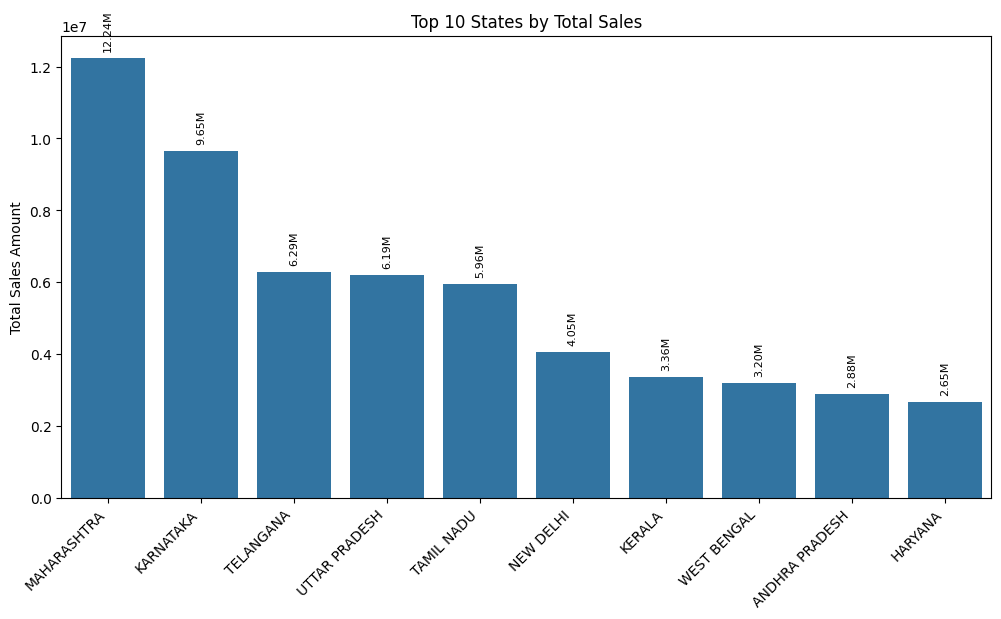

In [ ]:
reverse_state_mapping = {v: k for k, v in state_mapping.items()} # Create a reverse mapping of state codes to state names
state_sales['State'] = state_sales['State_Code'].map(reverse_state_mapping) # add new col in state_sales dataframe

# Top 10 states by total sales
top_10_states = state_sales.sort_values(by='Total_sales_Amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_states, x='State', y='Total_sales_Amount')
plt.ylabel('Total Sales Amount')
plt.title('Top 10 States by Total Sales')
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 10 **5 :
        height_formatted = f'{height / 10 ** 6:.2f}M'
    elif height >= 10 **2 and height<=10**5:
        height_formatted = f'{height / 10 ** 3:.2f}K'
    else:
        height_formatted = f'{height:.2f}'
    ax.annotate(height_formatted,
                (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points', rotation=90)
plt.show()


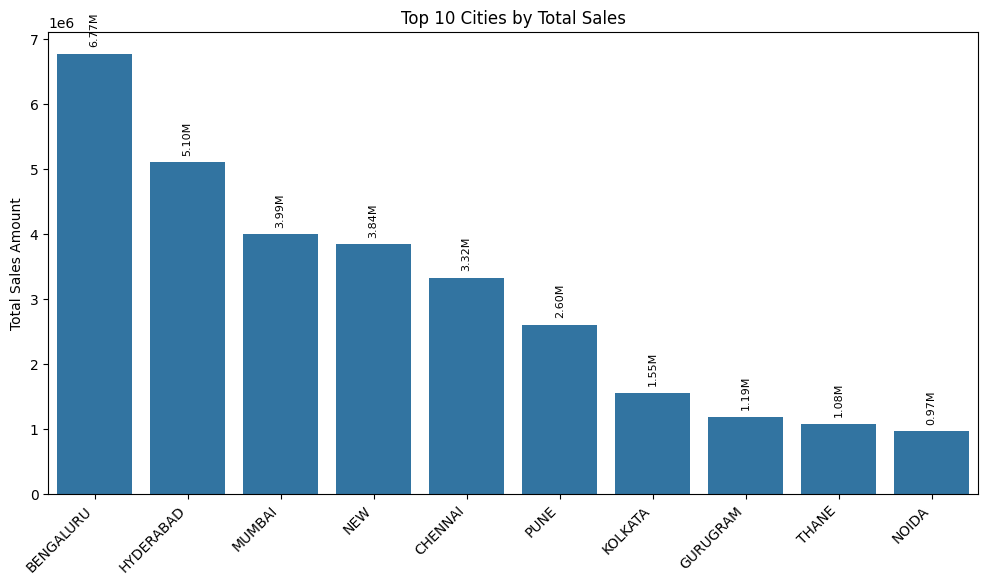

In [ ]:
# Top 10 Cities by Total Sales
city_sales = df_new1[df_new1['Status'] !='Cancelled'].groupby('ship-city').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
city_sales.columns = ['City', 'Total_sales_Amount', 'Number_of_Orders']
top_10_cities = city_sales.sort_values(by='Total_sales_Amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_cities, x='City', y='Total_sales_Amount')
plt.ylabel('Total Sales Amount')
plt.title('Top 10 Cities by Total Sales')
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if height > 10 **5 :
        height_formatted = f'{height / 10 ** 6:.2f}M'
    elif height >= 10 **2 and height<=10**5:
        height_formatted = f'{height / 10 ** 3:.2f}K'
    else:
        height_formatted = f'{height:.2f}'
    ax.annotate(height_formatted,
                (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points', rotation=90)
plt.show()


In [ ]:
print(top_10_cities)

           City  Total_sales_Amount  Number_of_Orders
595   BENGALURU           6765952.0             10551
1841  HYDERABAD           5101365.0              7841
3204     MUMBAI           3993608.0              6330
3487        NEW           3839715.0              5799
959     CHENNAI           3321901.0              5498
3999       PUNE           2601598.0              4061
2516    KOLKATA           1554992.0              2488
1692   GURUGRAM           1191734.0              1739
4797      THANE           1078928.0              1719
3536      NOIDA            965898.0              1440


<h1><b>6. Business Insights:</b></h1>

Provide actionable insights and recommendations based on the analysis to opmize sales strategies, improve customer satisfaction, and enhance overall business performance.

<h3><b>1. Focus on High-Performing Categories and Sizes:</b></h3><br>
<b>Category Emphasis:</b> The data indicates that product categories such as ‘T-shirts’ and ‘Shirts’ are significantly outperforming others. This trend is likely attributed to the onset of summer, leading to increased consumer demand for summer apparel. Allocate more resources (marketing, inventory) towards these high-performing categories.<br>

<b>Size Optimization:</b> Identify the most popular sizes within each category, such as ‘M’ and ‘L,’ and ensure adequate stock for these sizes. To balance inventory, consider offering discounts on less popular sizes to manage excess stock effectively.

<br>

<h3><b>2. Targeted Marketing and Promotions:</b></h3>
<b>Geographical Targeting:</b> Focus marketing efforts on Maharashtra, Karnataka, and Telangana, which are top-performing states. Customize campaigns to address local preferences and trends in these regions.<br>

<b>Seasonal Promotions:</b> Align promotions and discounts with monthly sales peaks to capitalize on high-demand periods and boost sales. <br>

<b>B2B Opportunities:</b> Develop tailored marketing strategies and pricing plans to explore and grow the B2B segment, aiming to attract and retain business customers.<br>

<b>Non-Performing States:</b> Consider expanding into non-performing states by opening new stores or service centres. This strategy can help tap into underserved markets and maximize profit potential in areas where competitors have limited presence.

<br>

<h3><b>3. Fulfilment Efficiency:</b></h3><br>
<b>Delivery Optimization:</b> Analyse delivery times, customer feedback, and costs for both "Merchant" and "Amazon" fulfilment methods. Identify and implement improvements to enhance delivery speed and customer satisfaction.<br>

<b>Order Tracking and Communication:</b> Upgrade the order tracking system and proactively inform customers about their order status. This will boost customer satisfaction and reduce the volume of inquiries.

<br>

<h3><b>4. Customer Retention and Loyalty:</b></h3><br>
<b>Personalised Recommendations:</b> Implement a recommendation system that leverages customer purchase history and browsing behaviour to suggest relevant products, thereby boosting sales.<br>

<b>Loyalty Programs:</b> Launch a loyalty program offering exclusive discounts, early access to sales, and other perks to reward repeat customers and enhance customer lifetime value.

<br>
<h3><b>5. Continuous Monitoring and Data-Driven Decisions:</b></h3>

<b>Dashboard Development:</b>  Create a comprehensive dashboard to visualize key metrics such as sales trends, product performance, customer demographics, and fulfilment efficiency for each category based on size preference and customer requirements. This enables real-time monitoring and data-driven decision-making.<br>

<b>Regular Analysis:</b>  Conduct regular analysis of sales data to identify emerging trends, customer preferences, and potential areas for improvement. This proactive approach ensures that strategies remain effective in a dynamic market.
